# Тест CoreNLP для создания триплетов

In [ ]:
from nn_graph_makers.corenlp_triples_maker_en import OpenIETriplesMaker
from directed_graph.graph import Graph

/home/simon/Desktop/concept-tree/concept-tree/.venv-concept-graph/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
text = """
    Biological systems reach organizational complexity that far exceeds the complexity of any
    known inanimate objects. Biological entities undoubtedly obey the laws of quantum physics and
    statistical mechanics. However, is modern physics sufficient to adequately describe, model and
    explain the evolution of biological complexity? Detailed parallels have been drawn between
    statistical thermodynamics and the population-genetic theory of biological evolution. Based on
    these parallels, we outline new perspectives on biological innovation and major transitions in
    evolution, and introduce a biological equivalent of thermodynamic potential that reflects the
    innovation propensity of an evolving population. Deep analogies have been suggested to also
    exist between the properties of biological entities and processes, and those of frustrated states in
    physics, such as glasses. Such systems are characterized by frustration whereby local state with
    minimal free energy conflict with the global minimum, resulting in “emergent phenomena”. We
    extend such analogies by examining frustration-type phenomena, such as conflicts between
    different levels of selection, in biological evolution. These frustration effects appear to drive the
    evolution of biological complexity. We further address evolution in multidimensional fitness
    landscapes from the point of view of percolation theory and suggest that percolation at level
    above the critical threshold dictates the tree-like evolution of complex organisms. Taken
    together, these multiple connections between fundamental processes in physics and biology
    imply that construction of a meaningful physical theory of biological evolution might not be a
    futile effort. However, it is unrealistic to expect that such a theory can be created in one scoop;
    if it ever comes to being, this can only happen through integration of multiple physical models of
    evolutionary processes. Furthermore, the existing framework of theoretical physics is unlikely to
    suffice for adequate modeling of the biological level of complexity, and new developments
    within physics itself are likely to be required.
"""

In [4]:
triples_maker = OpenIETriplesMaker(endpoint="http://localhost:9010")

Cpu count: 16


In [5]:
triples = triples_maker.extract_triples(text)
triples_maker.save_triples_to_csv(triples, "test_corenlp_triples.csv")

2025-03-23 13:13:45 INFO: Writing properties to tmp file: corenlp_server-30213a125c1e49d3.props
2025-03-23 13:13:45 INFO: Starting server with command: java -Xmx5G -cp corenlp_triples_maker/stanford-corenlp-4.5.8/* edu.stanford.nlp.pipeline.StanfordCoreNLPServer -port 9010 -timeout 30000 -threads 16 -maxCharLength 100000 -quiet True -serverProperties corenlp_server-30213a125c1e49d3.props -preload -outputFormat serialized


Триплеты сохранены в файл: test_corenlp_triples.csv


In [6]:
graph = Graph.build_from_triples_csv("test_corenlp_triples.csv")

In [7]:
from directed_graph.graph import visualize_graph_with_equivalent_elements

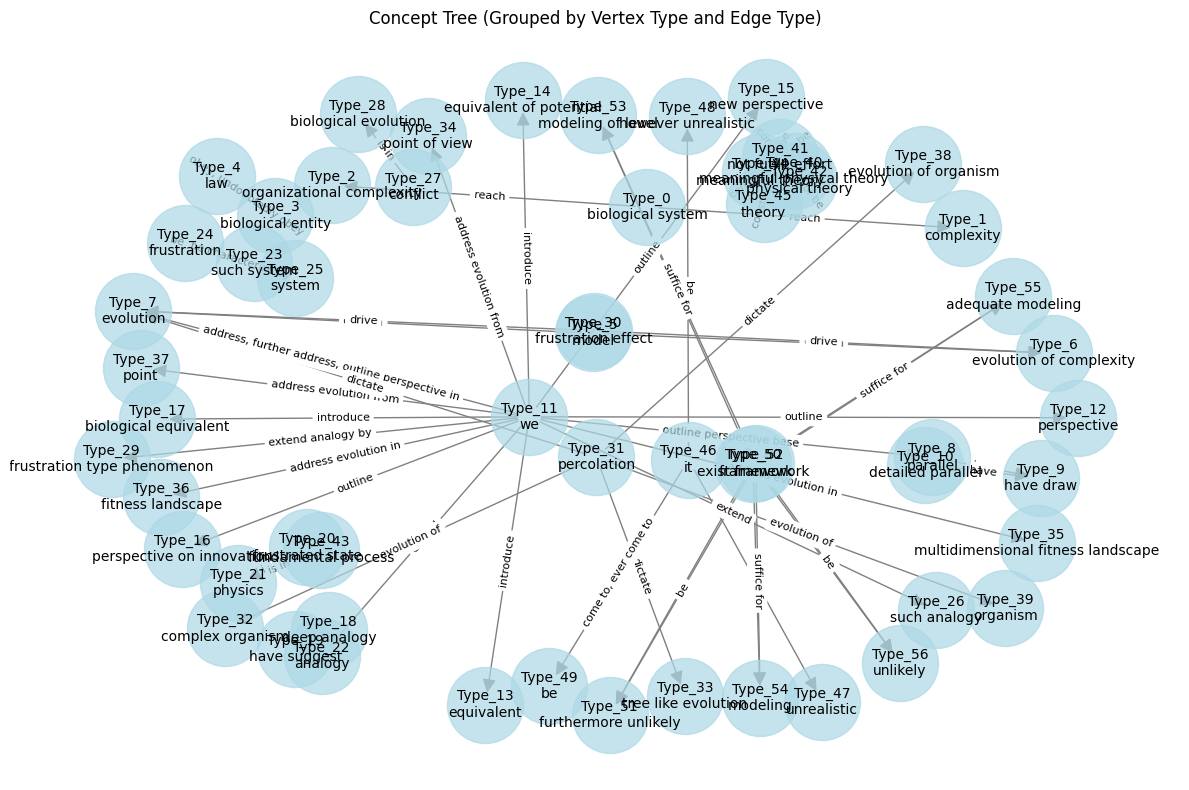

In [8]:
visualize_graph_with_equivalent_elements(graph)

In [9]:
for edge in graph.get_edges():
    print(edge, edge.label_pos)

Edge(biological system <--[reach]--> complexity) VBP
Edge(biological system <--[reach]--> organizational complexity) VBP
Edge(biological entity <--[obey]--> law) VBP
Edge(biological entity <--[undoubtedly obey]--> law) RB VBP
Edge(model <--[explain]--> evolution of complexity) VB
Edge(model <--[explain]--> evolution) VB
Edge(parallel <--[have]--> have draw) VBP
Edge(detailed parallel <--[have]--> have draw) VBP
Edge(we <--[outline]--> perspective) VBP
Edge(we <--[introduce]--> equivalent) VB
Edge(we <--[introduce]--> equivalent of potential) VB
Edge(we <--[outline perspective base]--> parallel) VBP NNS VBN
Edge(we <--[outline perspective in]--> evolution) VBP NNS IN
Edge(we <--[outline]--> new perspective) VBP
Edge(we <--[outline]--> perspective on innovation) VBP
Edge(we <--[introduce]--> biological equivalent) VB
Edge(deep analogy <--[have]--> have suggest) VBP
Edge(frustrated state <--[is in]--> physics) UNKNOWN IN
Edge(analogy <--[have]--> have suggest) VBP
Edge(such system <--[be 

# Тест разрешения анафоры c помощью CoreNLP

In [ ]:
from nn_graph_makers.corenlp_coref_resolver_en import CoreferenceResolver

In [12]:
coref_resolver = CoreferenceResolver(endpoint="http://localhost:9015")

In [13]:
text_with_coreference="""
John decided to go to the park.

        He wanted to relax after a long day at work.

        The park was quiet, and John found a bench to sit on.

        He noticed a dog running around nearby.

        The dog seemed friendly, and it approached him.

        John petted the dog, and it wagged its tail happily.

        After a while, the dog ran off to play with another dog.

        John watched them for a few minutes before deciding to leave.

        On his way home, he stopped by a café.

        The café was cozy, and he ordered a cup of coffee.

        While drinking his coffee, John opened a book he had brought with him.

        The book was about history, and it was quite interesting.

        He read for about an hour before realizing it was getting late.

        John paid for his coffee and left the café.

        As he walked home, he thought about the book.

        It had given him a lot to think about.

        When John arrived home, he called his friend Sarah.

        She was excited to hear about his day.

        Sarah told him about her own day, and they chatted for a while.

        After the call, John felt happy and went to bed.
"""

In [14]:
text_resolved = coref_resolver.resolve_coreferences(text_with_coreference, algorithm='statistical')

2025-03-23 13:14:19 INFO: Writing properties to tmp file: corenlp_server-54c70c4270804d87.props
2025-03-23 13:14:19 INFO: Starting server with command: java -Xmx5G -cp corenlp_triples_maker/stanford-corenlp-4.5.8/* edu.stanford.nlp.pipeline.StanfordCoreNLPServer -port 9015 -timeout 60000 -threads 5 -maxCharLength 100000 -quiet True -serverProperties corenlp_server-54c70c4270804d87.props -preload -outputFormat serialized


In [15]:
print(text_resolved)


John decided to go to the park.

        John wanted to relax after a long day at work.

        the park was quiet, and John found a bench to sit on.

        John noticed a dog running around nearby.

        a dog running around nearby seemed friendly, and a dog running around nearby approached John.

        John petted a dog running around nearby, and it wagged it tail happily.

        After a while, a dog running around nearby ran off to play with another dog.

        John watched them for a few minutes before deciding to leave.

        On John way home, John stopped by a café.

        a café was cozy, and John ordered a cup of his coffee.

        While drinking John coffee, John opened a book John had brought with John.

        a book he had brought with him was about history, and a book he had brought with him was quite interesting.

        John read for about an hour before realizing a book he had brought with him was getting late.

        John paid for his coffeee an

In [16]:
triples_maker = OpenIETriplesMaker(endpoint="http://localhost:9010")

Cpu count: 16


In [20]:
triples = triples_maker.extract_triples(text_resolved)

2025-03-23 13:15:14 INFO: Writing properties to tmp file: corenlp_server-b7489d1704a0470a.props
2025-03-23 13:15:14 INFO: Starting server with command: java -Xmx5G -cp corenlp_triples_maker/stanford-corenlp-4.5.8/* edu.stanford.nlp.pipeline.StanfordCoreNLPServer -port 9010 -timeout 30000 -threads 16 -maxCharLength 100000 -quiet True -serverProperties corenlp_server-b7489d1704a0470a.props -preload -outputFormat serialized


In [21]:
triples_maker.save_triples_to_csv(triples, 'test_corenlp_triples.csv')

Триплеты сохранены в файл: test_corenlp_triples.csv


In [22]:
graph = Graph.build_from_triples_csv('test_corenlp_triples.csv')

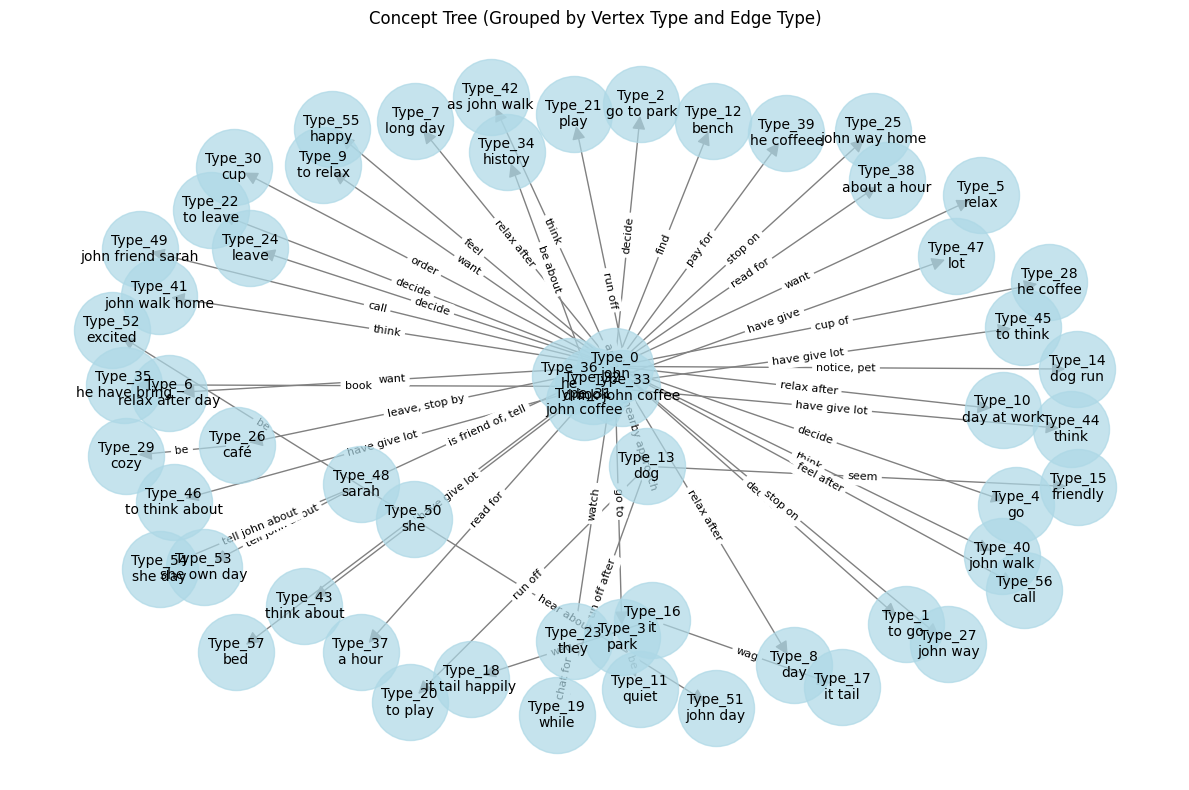

In [23]:
visualize_graph_with_equivalent_elements(graph)

In [24]:
for edge in graph.get_edges():
    print(edge, edge.label_pos)

Edge(john <--[decide]--> to go) VBD
Edge(john <--[decide]--> go to park) VBD
Edge(john <--[go to]--> park) VB IN
Edge(john <--[decide]--> go) VBD
Edge(john <--[want]--> relax) VBD
Edge(john <--[want]--> relax after day) VBD
Edge(john <--[relax after]--> long day) VB IN
Edge(john <--[relax after]--> day) VB IN
Edge(john <--[want]--> to relax) VBD
Edge(john <--[relax after]--> day at work) VB IN
Edge(park <--[be]--> quiet) VBD
Edge(john <--[find]--> bench) VBD
Edge(john <--[notice]--> dog) VBD
Edge(john <--[notice]--> dog run) VBD
Edge(dog <--[approach]--> john) VBN
Edge(dog <--[nearby approach]--> john) RB VBN
Edge(dog <--[seem]--> friendly) VBD
Edge(it <--[wag]--> it tail) VBD
Edge(john <--[pet]--> dog) VBD
Edge(it <--[wag]--> it tail happily) VBD
Edge(john <--[pet]--> dog run) VBD
Edge(dog <--[run off after]--> while) VBD RP IN
Edge(dog <--[run off]--> to play) VBD RP
Edge(dog <--[run off]--> play) VBD RP
Edge(john <--[decide]--> to leave) VBG
Edge(john <--[watch]--> they) VBD
Edge(jo

In [25]:
triples = triples_maker.extract_triples(text_with_coreference)
triples_maker.save_triples_to_csv(triples, 'test_corenlp_triples.csv')

2025-03-23 13:18:17 INFO: Writing properties to tmp file: corenlp_server-8f8116dbe1fa455e.props
2025-03-23 13:18:17 INFO: Starting server with command: java -Xmx5G -cp corenlp_triples_maker/stanford-corenlp-4.5.8/* edu.stanford.nlp.pipeline.StanfordCoreNLPServer -port 9010 -timeout 30000 -threads 16 -maxCharLength 100000 -quiet True -serverProperties corenlp_server-8f8116dbe1fa455e.props -preload -outputFormat serialized


Триплеты сохранены в файл: test_corenlp_triples.csv


In [26]:
triples_maker.save_triples_to_csv(triples, 'test_corenlp_triples.csv')

Триплеты сохранены в файл: test_corenlp_triples.csv


In [27]:
graph = Graph.build_from_triples_csv('test_corenlp_triples.csv')

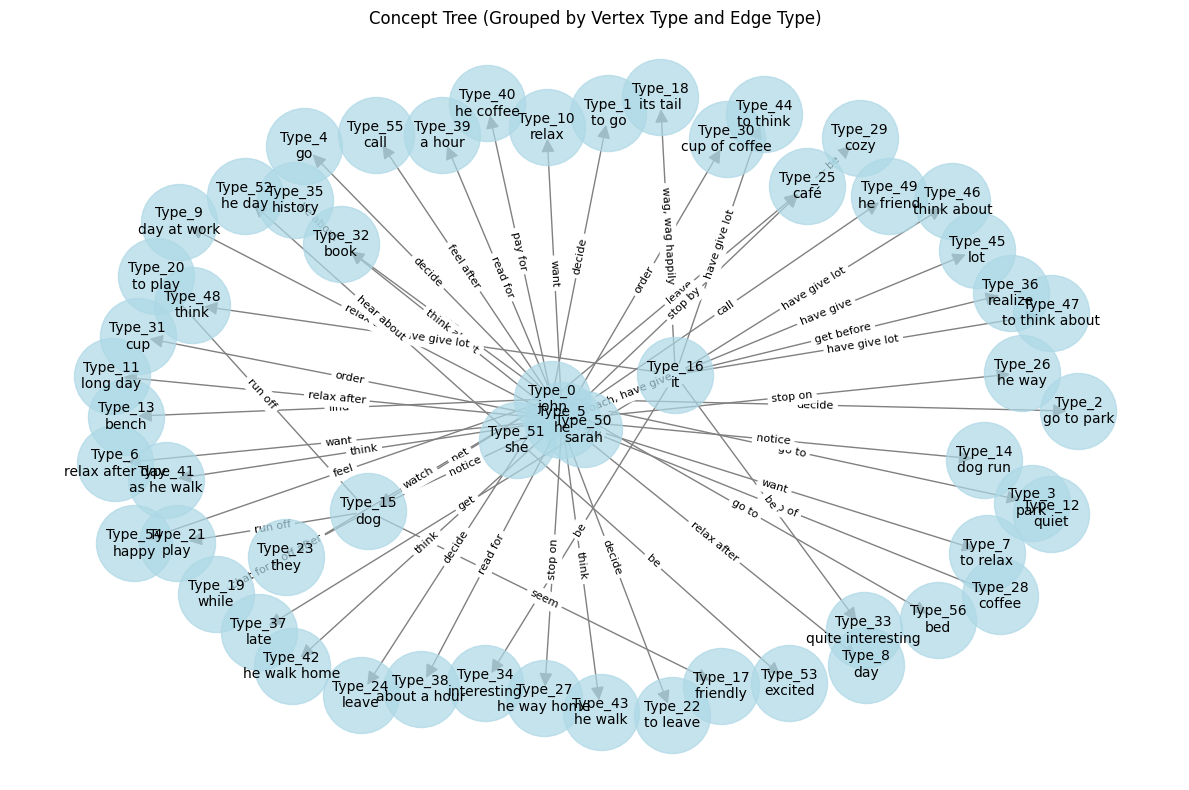

In [28]:
visualize_graph_with_equivalent_elements(graph)

In [29]:
for edge in graph.get_edges():
    print(edge, edge.label_pos)

Edge(john <--[decide]--> to go) VBD
Edge(john <--[decide]--> go to park) VBD
Edge(john <--[go to]--> park) VB IN
Edge(john <--[decide]--> go) VBD
Edge(he <--[want]--> relax after day) VBD
Edge(he <--[want]--> to relax) VBD
Edge(he <--[relax after]--> day) VB IN
Edge(he <--[relax after]--> day at work) VB IN
Edge(he <--[want]--> relax) VBD
Edge(he <--[relax after]--> long day) VB IN
Edge(park <--[be]--> quiet) VBD
Edge(john <--[find]--> bench) VBD
Edge(he <--[notice]--> dog run) VBD
Edge(he <--[notice]--> dog) VBD
Edge(it <--[approach]--> he) VBD
Edge(dog <--[seem]--> friendly) VBD
Edge(john <--[pet]--> dog) VBD
Edge(it <--[wag happily]--> its tail) VBD RB
Edge(it <--[wag]--> its tail) VBD
Edge(dog <--[run off after]--> while) VBD RP IN
Edge(dog <--[run off]--> to play) VBD RP
Edge(dog <--[run off]--> play) VBD RP
Edge(john <--[decide]--> to leave) VBG
Edge(john <--[watch]--> they) VBD
Edge(john <--[decide]--> leave) VBG
Edge(he <--[stop by]--> café) VBD IN
Edge(he <--[stop on]--> he wa